In [95]:
import matplotlib
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set_style('darkgrid') 
matplotlib.rcParams['figure.figsize'] = (30,30)
pd.set_option('display.max_columns', None)

## Importing `.csv`

In [2]:
df = pd.read_csv('df.csv')
df.set_index('FIPS');

# Dataset exploration

## Visual exploration

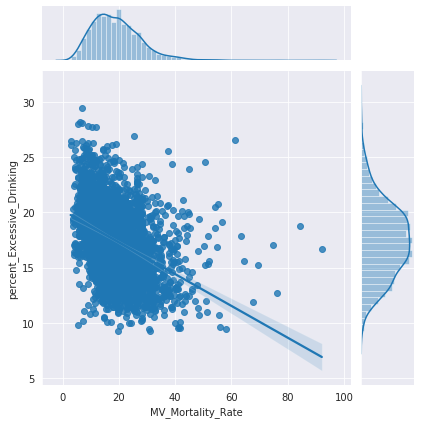

In [3]:
sns.jointplot('MV_Mortality_Rate','percent_Excessive_Drinking', data=df, kind='reg');

- Create graph matrix with [features]

## Multicollinearity check

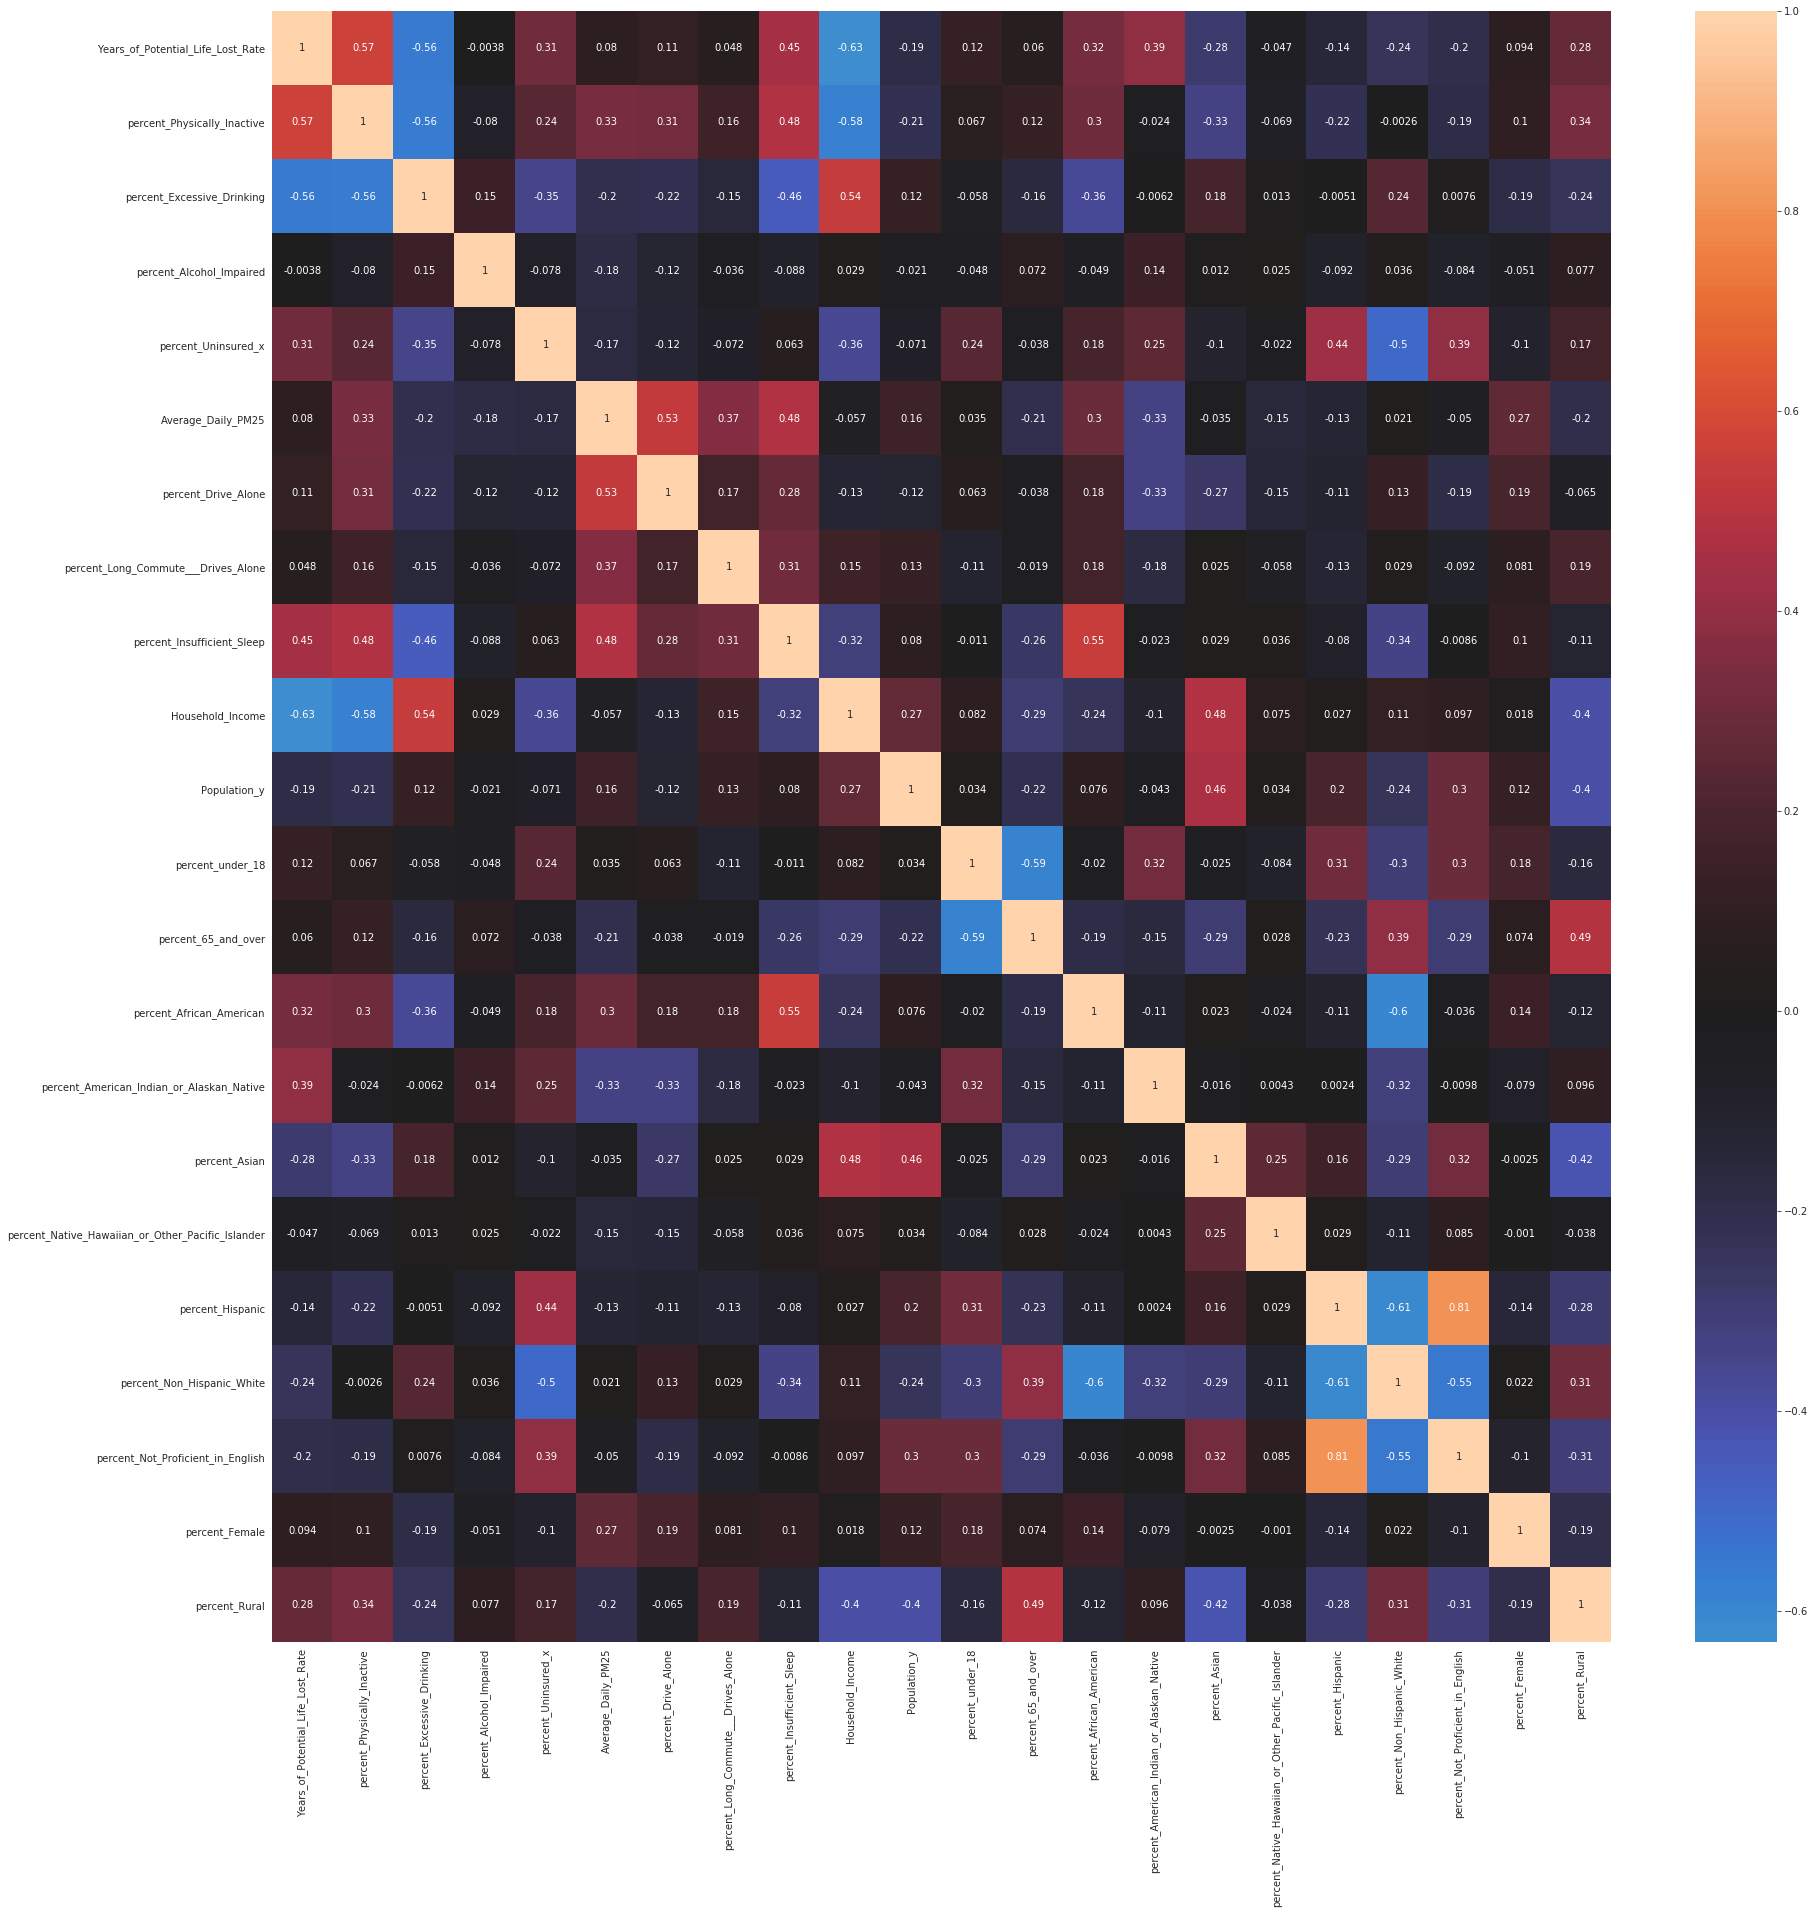

In [44]:
features = ['MV_Mortality_Rate',
            'Years_of_Potential_Life_Lost_Rate',
            'percent_Physically_Inactive',
            'percent_Excessive_Drinking',
            'percent_Alcohol_Impaired',
            'percent_Uninsured_x',
            'Average_Daily_PM25',
            'percent_Drive_Alone',
            'percent_Long_Commute___Drives_Alone',
            'percent_Insufficient_Sleep',
            'Household_Income',
            'Population_y',
            'percent_under_18',
            'percent_65_and_over',
            'percent_African_American',
            'percent_American_Indian_or_Alaskan_Native',
            'percent_Asian',
            'percent_Native_Hawaiian_or_Other_Pacific_Islander',
            'percent_Hispanic',
            'percent_Non_Hispanic_White',
            'percent_Not_Proficient_in_English',
            'percent_Female',
            'percent_Rural'
        ]
# MV_Mortality_Rate covers a period of 7 years, by dividing we can get a yearly understanding
# (there is some variation between years but we haven't got that far)
target = df['MV_Mortality_Rate']/7
dfFeatures = df[features].drop(columns='MV_Mortality_Rate')
sns.heatmap(dfFeatures.corr(), center=0, annot=True);

In [5]:
corr = dfFeatures.corr()
corr

,Years_of_Potential_Life_Lost_Rate,percent_Physically_Inactive,percent_Excessive_Drinking,percent_Alcohol_Impaired,percent_Uninsured_x,Average_Daily_PM25,percent_Drive_Alone,percent_Long_Commute___Drives_Alone,percent_Insufficient_Sleep,Household_Income,Population_y,percent_under_18,percent_65_and_over,percent_African_American,percent_American_Indian_or_Alaskan_Native,percent_Asian,percent_Native_Hawaiian_or_Other_Pacific_Islander,percent_Hispanic,percent_Non_Hispanic_White,percent_Not_Proficient_in_English,percent_Female,percent_Rural
Years_of_Potential_Life_Lost_Rate,1.000000,0.565444,-0.557734,-0.003774,0.308123,0.079999,0.110067,0.047675,0.449402,-0.630612,-0.186620,0.115551,0.059608,0.322743,0.389337,-0.283152,-0.047245,-0.142290,-0.239348,-0.198481,0.093823,0.277603
percent_Physically_Inactive,0.565444,1.000000,-0.562618,-0.079836,0.238215,0.333244,0.314471,0.160794,0.479812,-0.577904,-0.213562,0.066505,0.118582,0.303530,-0.024387,-0.329574,-0.069433,-0.222706,-0.002632,-0.188890,0.100557,0.337525
percent_Excessive_Drinking,-0.557734,-0.562618,1.000000,0.146072,-0.348184,-0.204653,-0.216059,-0.150775,-0.455225,0.539503,0.116615,-0.057803,-0.162691,-0.363502,-0.006236,0.179619,0.013160,-0.005061,0.235220,0.007565,-0.189344,-0.237913
percent_Alcohol_Impaired,-0.003774,-0.079836,0.146072,1.000000,-0.078359,-0.181410,-0.120716,-0.035783,-0.088017,0.029019,-0.020938,-0.048225,0.071929,-0.048775,0.141282,0.012500,0.025101,-0.092469,0.036284,-0.083524,-0.050500,0.077000
percent_Uninsured_x,0.308123,0.238215,-0.348184,-0.078359,1.000000,-0.166998,-0.124511,-0.071670,0.063010,-0.360481,-0.071082,0.237631,-0.038399,0.180562,0.252247,-0.102214,-0.021692,0.438906,-0.501915,0.393207,-0.101166,0.167953
Average_Daily_PM25,0.079999,0.333244,-0.204653,-0.181410,-0.166998,1.000000,0.529734,0.365664,0.483532,-0.057079,0.158192,0.034642,-0.206558,0.298081,-0.329274,-0.034926,-0.148774,-0.127083,0.021431,-0.049819,0.266789,-0.202904
percent_Drive_Alone,0.110067,0.314471,-0.216059,-0.120716,-0.124511,0.529734,1.000000,0.172043,0.279309,-0.125857,-0.116112,0.062504,-0.037726,0.176601,-0.329492,-0.273643,-0.145307,-0.112422,0.131482,-0.185354,0.192522,-0.064984
percent_Long_Commute___Drives_Alone,0.047675,0.160794,-0.150775,-0.035783,-0.071670,0.365664,0.172043,1.000000,0.306148,0.150340,0.125439,-0.110645,-0.019270,0.177700,-0.176115,0.024650,-0.058058,-0.127102,0.029210,-0.092009,0.081293,0.189173
percent_Insufficient_Sleep,0.449402,0.479812,-0.455225,-0.088017,0.063010,0.483532,0.279309,0.306148,1.000000,-0.315781,0.080251,-0.010503,-0.257487,0.548037,-0.022854,0.028972,0.035838,-0.079545,-0.337539,-0.008598,0.102703,-0.114779
Household_Income,-0.630612,-0.577904,0.539503,0.029019,-0.360481,-0.057079,-0.125857,0.150340,-0.315781,1.000000,0.271010,0.081873,-0.287534,-0.241872,-0.102722,0.478975,0.075388,0.027196,0.110902,0.097068,0.017682,-0.396200


# SciKit Baseline model

## Baseline modelling

In [30]:
# Train/Test split (25%)
X_train, X_test, y_train, y_test = train_test_split(dfFeatures,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=100
                                                   )
# Initialising K-Folds
kfold = KFold(n_splits=10, random_state=100, shuffle=True)

In [39]:
# Scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# model type
model = LinearRegression()

# modelling itself
model.fit(X_train_s,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
results_kfold = cross_val_score(LinearRegression(),
                                                X_train_s,
                                                y_train,
                                                cv=kfold
                                               )
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 58.66%


In [41]:
crossval = cross_validate(LinearRegression(),
                                          X_train_s,
                                          y_train,
                                          scoring=('r2', 'neg_mean_squared_error'),
                                          cv=kfold,
                                          return_train_score=True
                                         )
for key, value in crossval.items():
    print(key, np.mean(value))

fit_time 0.00457766056060791
score_time 0.0015839338302612305
test_r2 0.5866163360272292
train_r2 0.6038193919279629
test_neg_mean_squared_error -33.47621695927929
train_neg_mean_squared_error -31.9882385850194


In [16]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

2356 786 2356 786


In [43]:
# The coefficients
for i, column in enumerate(X_train.columns):
    print(f"The coefficient for {column} is {round(model.coef_[i],5)}")
print('----------------------')
# The intercept
print("The intercept is {}".format(model.intercept_))

The coefficient for Years_of_Potential_Life_Lost_Rate is 3.88007
The coefficient for percent_Physically_Inactive is 1.63869
The coefficient for percent_Excessive_Drinking is 0.03492
The coefficient for percent_Alcohol_Impaired is 0.21386
The coefficient for percent_Uninsured_x is 0.8036
The coefficient for Average_Daily_PM25 is -0.39166
The coefficient for percent_Drive_Alone is 0.5622
The coefficient for percent_Long_Commute___Drives_Alone is 0.56418
The coefficient for percent_Insufficient_Sleep is -2.09395
The coefficient for Household_Income is -0.09486
The coefficient for Population_y is -0.13565
The coefficient for percent_under_18 is 1.14825
The coefficient for percent_65_and_over is 0.35873
The coefficient for percent_African_American is 8.79104
The coefficient for percent_American_Indian_or_Alaskan_Native is 4.43353
The coefficient for percent_Asian is 1.90862
The coefficient for percent_Native_Hawaiian_or_Other_Pacific_Islander is 1.01223
The coefficient for percent_Hispanic 

### SciKit Cross validation

In [18]:
# MSE and R_squared
y_hat_train = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_hat_train)
print('----------------------')
print('Train Mean Squarred Error:', train_mse)
print('r_squared_score:',r2_score(y_train, y_hat_train))

----------------------
Train Mean Squarred Error: 32.05067586336397
r_squared_score: 0.6030079234113668


### Polynomial code

In [91]:
# degree: 0.5, 1, 2, 3, 4
scaler = StandardScaler()

# Polynomial transformation
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
model = LinearRegression()
X_poly_s = scaler.fit_transform(X_poly)
lin_reg_1 = model.fit(X_poly_s,y_train)
y_pred = lin_reg_1.predict(X_poly_s)
print(f'Rsquared = {r2_score(y_train,lin_reg_1.predict(X_poly_s))}')

Rsquared = 0.714365433900179


### Standardisation

In [ ]:
# Scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# model type
model = LinearRegression().fit(X_train,y_train)

### LASSO and Ridge regressions

### Hyper parameter tuning

In [79]:
model = Lasso()
# alpha was narrowed down manually
lasso_params = {'alpha' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]}

grid = GridSearchCV(estimator = model, 
                    param_grid = lasso_params, 
                    scoring = 'r2',
                    cv = 5,
                    n_jobs = -1)

grid = grid.fit(X_train_s, y_train)
grid.best_params_

{'alpha': 0.03}

In [80]:
model = Ridge()
# alpha was narrowed down manually
ridge_params = {'alpha' : [1, 2, 3, 4, 5, 6, 7, 7.1, 7.2, 7.3, 7.5, 8, 9, 10]}

grid = GridSearchCV(estimator = model, 
                    param_grid = ridge_params, 
                    scoring = 'r2',
                    cv = 5,
                    n_jobs = -1)

grid = grid.fit(X_train_s, y_train)
grid.best_params_

{'alpha': 7.2}

In [100]:
model = ElasticNet()
# alpha was narrowed down manually
elastic_params = {'alpha' : [0.01, .02, .03, .04, .1]}

grid = GridSearchCV(estimator = model, 
                    param_grid = elastic_params, 
                    scoring = 'r2',
                    cv = 5,
                    n_jobs = -1)

grid = grid.fit(X_train_s, y_train)
grid.best_params_

{'alpha': 0.03}

In [82]:
lasso = Lasso(alpha=0.03)
lasso.fit(X_train_s, y_train)
y_h_lasso_train = lasso.predict(X_train_s)
y_h_lasso_test = lasso.predict(X_test_s)
print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('Lasso parameter coefficients:', lasso.coef_)
print('\n')

Train Error Lasso Model 76365.32607179094
Test Error Lasso Model 25849.282353891092
Lasso parameter coefficients: [ 3.90824657  1.56595457  0.          0.15421621  0.62110615 -0.22514885
  0.49030974  0.47267773 -2.1295701  -0.0225089  -0.08888339  1.07469844
  0.30377944  0.75959706 -0.10903822  0.          0.11126222  1.07111569
 -0.         -0.         -0.54772223  3.16813083]




In [92]:
ridge = Ridge(alpha=7.2)
ridge.fit(X_train_s, y_train)
y_h_ridge_train = ridge.predict(X_train_s)
# y_h_ridge_test = ridge.predict(X_test_s)
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
# print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('Ridge parameter coefficients:', ridge.coef_)

Train Error Ridge Model 75955.5411134293
Ridge parameter coefficients: [ 3.913541    1.59165195  0.06824993  0.19197003  0.68582819 -0.30755279
  0.53451766  0.5716138  -2.14706649 -0.12447504 -0.12386472  1.21966452
  0.41428082  2.74481308  0.93374199  0.53771525  0.35896204  2.96230284
  2.78890855 -0.14157855 -0.60788448  3.06767777]


## Statsmod model

In [ ]:
train, test = model_selection.train_test_split(df)

In [ ]:
outcome = 'MV_Mortality_Rate'
predictors = '+'.join(features)

formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

### Statsmodels

In [ ]:
data = df[features]

y = pd.DataFrame(df.MV_Mortality_Rate)
X = pd.DataFrame(data, columns = data.columns)

X_scaled = scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

all_data = pd.concat([y, X_scaled], axis=1)
regression = LinearRegression()

crossvalidation = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(model_selection.cross_val_score(regression, X_scaled, y, scoring='r2', cv=crossvalidation))
print("Accuracy: %.2f%%" % (baseline*100))

### Remove uninfluencial features

In [ ]:
# # Your code here - Remove features which do not appear to be statistically relevant
# # Extract the p-value table from the summary and use it to subset our features
# summary = model.summary()
# p_table = summary.tables[1]
# p_table = pd.DataFrame(p_table.data)
# p_table.columns = p_table.iloc[0]
# p_table = p_table.drop(0)
# p_table = p_table.set_index(p_table.columns[0])
# p_table['P>|t|'] = p_table['P>|t|'].astype(float)
# x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
# x_cols.remove('Intercept')
# print(len(p_table), len(x_cols))
# print(x_cols[:5])
# p_table.head()

## Model accuracy

In [ ]:
# result = model.score(X_test, Y_test)
# print("Accuracy: %.2f%%" % (result*100.0))

# Test dataset

In [ ]:
# y_hat_test = model.predict(X_test)
# test_mse = mean_squared_error(y_test, y_hat_test)

## Homoscedasticity check

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
sns.scatterplot(model.predict(X_train), model.resid)
sns.scatterplot(model.predict(X_train), [0 for i in range(len(X_train))])